In [33]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

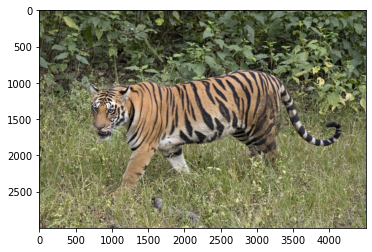

In [34]:
# Wczytywanie obrazu
image_url = "https://github.com/jgrynczewski/tensorflow_intro/raw/master/tiger.jpg"

response = requests.get(image_url)
# zrzutowanie odpowiedzi do obiektu Image biblioteki PIL
color_img = Image.open(BytesIO(response.content))

# zrzutowanie obiektu Image do tablicy numpy
color_data = np.asarray(color_img)

plt.imshow(color_data)

In [35]:
# Wczytanie wyuczonego klasyfikatora
# https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2

efficientnetv2s_model_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2"
classifier = hub.load(efficientnetv2s_model_url)

In [36]:
# Wczytanie etykiet
labels_file = "https://raw.githubusercontent.com/jgrynczewski/tensorflow_intro/master/ImageNetLabels.txt"


downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


In [37]:
# Zmiana rozmiarów i rzutowanie obrazu na tf.Tensor + zmiana rozmiarów
# Na podstawie https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2

image_size = 384

# zmiana kształtu na [batch_size, height, width, num_channels]
img = tf.reshape(color_data, [1, color_data.shape[0], color_data.shape[1], color_data.shape[2]])

# metoda `convert_image_dtype` do konwersji floats do zakresu [0,1]
image = tf.image.convert_image_dtype(img, tf.float32)

img_reshaped = tf.image.resize_with_pad(image, image_size, image_size)

print(image)

tf.Tensor(
[[[[0.24705884 0.27450982 0.10196079]
   [0.24313727 0.27058825 0.09803922]
   [0.24705884 0.2784314  0.07843138]
   ...
   [0.28627452 0.34509805 0.19215688]
   [0.31764707 0.3647059  0.21568629]
   [0.3372549  0.3803922  0.21176472]]

  [[0.23137257 0.2784314  0.09803922]
   [0.24705884 0.28235295 0.10588236]
   [0.2392157  0.27450982 0.09019608]
   ...
   [0.2784314  0.34117648 0.20000002]
   [0.3254902  0.36862746 0.20392159]
   [0.34117648 0.4039216  0.21960786]]

  [[0.23529413 0.26666668 0.10588236]
   [0.2392157  0.27450982 0.09803922]
   [0.23137257 0.27450982 0.10980393]
   ...
   [0.29803923 0.3529412  0.16078432]
   [0.33333334 0.37647063 0.21960786]
   [0.34901962 0.3921569  0.23529413]]

  ...

  [[0.5254902  0.5803922  0.43921572]
   [0.5921569  0.6392157  0.45098042]
   [0.56078434 0.5686275  0.42352945]
   ...
   [0.5137255  0.5254902  0.34117648]
   [0.42352945 0.4156863  0.2627451 ]
   [0.50980395 0.48627454 0.3921569 ]]

  [[0.6117647  0.59607846 0.407843

(1)  293 - tiger: 0.49298399686813354
(2)  283 - tiger cat: 0.3141303062438965
(3)  288 - lynx: 0.008883414790034294
(4)  291 - jaguar: 0.0076154316775500774
(5)  289 - leopard: 0.005749857984483242


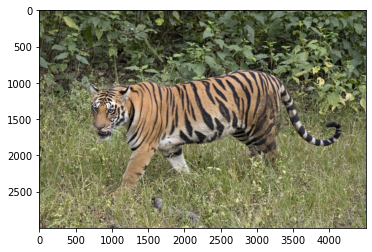

In [38]:
# Przekazanie obrazu do modelu
probabilities = tf.nn.softmax(classifier(image)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Niektóre modele przewidują dodatkowo 'background', należy to uwzględnić 
# wczytująt etykiety.
includes_background_class = probabilities.shape[1] == 1001

# 5 najlepszych prognoz
for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

# # 
# image_size = image.shape[1]
# plt.figure(figsize=(image_size, image_size))
plt.imshow(image[0])
plt.show()


Transfer wiedzy (*ang. Transfer learning*)